<a href="https://colab.research.google.com/github/masher5764/All_ML_Models-Quick-Rev-/blob/main/All_MachineLearning__codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
height, weight = make_regression(n_features=1, n_samples=100, noise=10, random_state=42)
height = height.flatten() * 7 + 170
weight = weight * 0.3 + 65

In [ ]:
data = pd.DataFrame({
    'Height': height,
    'Weight': weight
})

In [ ]:
data.head()

,Height,Weight
0,176.518961,80.233979
1,170.609329,61.980419
2,162.596023,54.524482
3,172.199731,68.158023
4,166.645780,59.678487


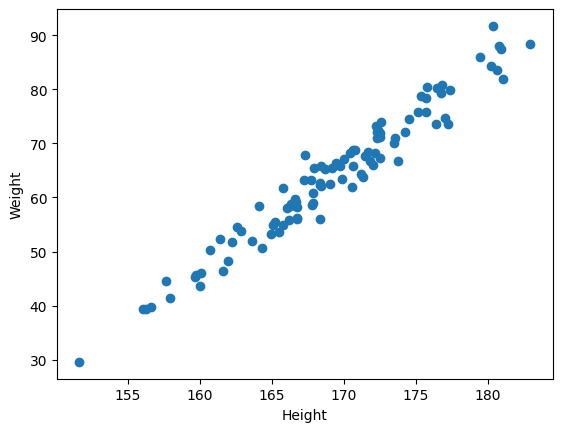

In [ ]:
plt.scatter(data["Height"], data["Weight"])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [ ]:
x = data[['Height']]
y = data[['Weight']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x.shape, y.shape

((100, 1), (100, 1))

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80, 1), (20, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

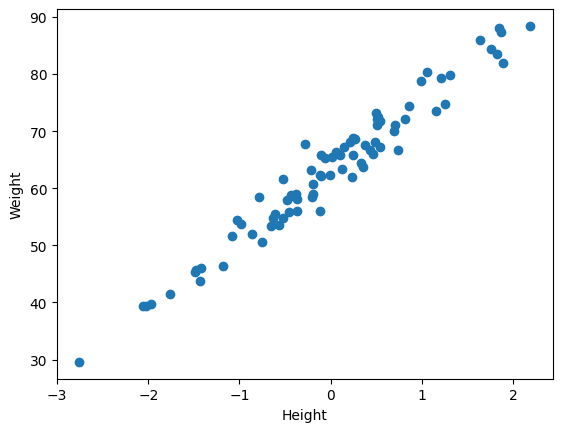

In [ ]:
plt.scatter(x_train, y_train)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("slope or coef of weight", model.coef_)
print("intercept", model.intercept_)

slope or coef of weight [[12.00327554]]
intercept [63.32210348]


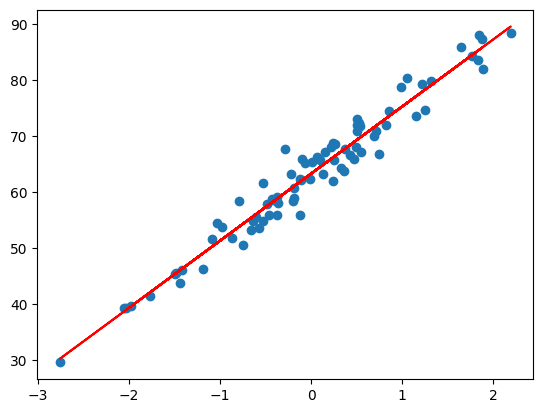

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color='red')
# y = mx + c
# y_pred_train = 12.00327554(x_train) + 63.32210348

In [ ]:
y_pred = model.predict(x_test)

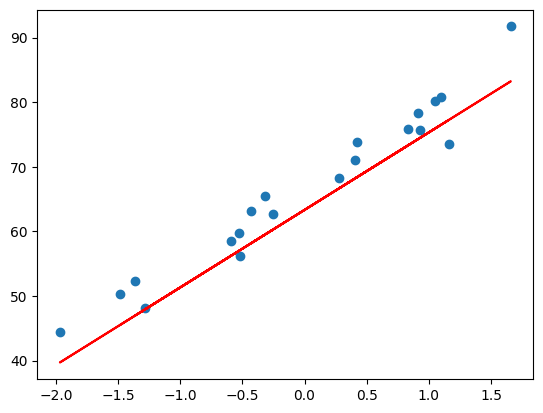

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, model.predict(x_test), color='red')

In [ ]:
y_pred, y_test

(array([[45.54991239],
        [83.22842218],
        [74.29422136],
        [58.11905475],
        [60.23998518],
        [59.46736447],
        [57.13050413],
        [39.71092913],
        [74.42012632],
        [75.88878915],
        [77.22776679],
        [68.17918114],
        [46.99124745],
        [56.27073825],
        [47.92915605],
        [56.94997895],
        [76.48315548],
        [66.63300585],
        [73.29979433],
        [68.42873636]]),
        Weight
 83  50.315276
 53  91.709944
 70  78.322759
 45  63.226606
 44  62.712671
 39  65.524292
 22  56.190220
 80  44.501974
 10  75.729720
 0   80.233979
 18  73.590392
 30  71.085762
 73  52.332961
 33  58.492108
 90  48.181395
 4   59.678487
 76  80.867310
 77  68.336974
 12  75.856330
 31  73.856662)

MSE, MAE, RMSE

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(mse, mae, rmse)

17.248681432873205 3.672953454059453 4.153153191597103


R2, Adj R2

In [ ]:
from sklearn.metrics import r2_score
n_samples = len(y_test)
n_features = x.shape[1]

r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

print(r2, adj_r2)

0.8848919931445876 0.8784971038748424


In [ ]:
new_data = [[170]]
new_data = scaler.transform(new_data)
model.predict(new_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[63.38406871]])

# Logistic Regression (Binary)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x_data, y_data = make_classification(n_samples = 1000, n_features = 10, n_classes = 2, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred))

accuracy_score =  0.83
[[75 14]
 [20 91]]

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



**Hyperparameter Tuning** => GridSearchCV

In [ ]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet','none']
c_value = [100,10,1.0,0.1,0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [ ]:
params = dict(penalty = penalty, C = c_value, solver = solver)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model, param_grid = params, scoring = 'accuracy', cv = cv)

In [ ]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
grid.best_score_

np.float64(0.8787500000000001)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred))

accuracy_score =  0.825
[[78 11]
 [24 87]]

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        89
           1       0.89      0.78      0.83       111

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



**Hyperparameter Tuning** => RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet','none']
c_value = [100,10,1.0,0.1,0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
randomcv = RandomizedSearchCV(estimator = model, param_distributions = params, scoring = 'accuracy', cv = cv)

In [ ]:
randomcv.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [ ]:
randomcv.best_score_

np.float64(0.8787499999999999)

In [ ]:
randomcv.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

In [ ]:
y_pred = randomcv.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred))

accuracy_score =  0.825
[[78 11]
 [24 87]]

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        89
           1       0.89      0.78      0.83       111

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



# Logistic Regression (Multivalued)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x_data, y_data = make_classification(n_samples = 1000, n_features = 10, n_informative = 3, n_classes = 3, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size= 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class = 'ovr')
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred))

accuracy_score =  0.65
[[49 12  5]
 [25 27 17]
 [ 2  9 54]]

              precision    recall  f1-score   support

           0       0.64      0.74      0.69        66
           1       0.56      0.39      0.46        69
           2       0.71      0.83      0.77        65

    accuracy                           0.65       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.64      0.65      0.64       200



# Support Vector Machine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x_data, y_data = make_classification(n_samples = 1000, n_features = 2, n_classes= 2, n_clusters_per_class=2, n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

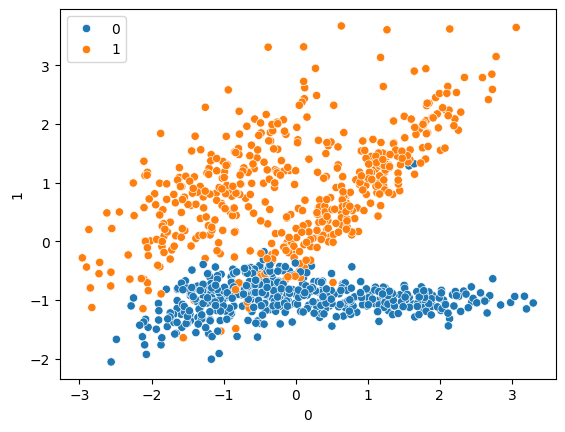

In [ ]:
sns.scatterplot(x=pd.DataFrame(x_data)[0], y=pd.DataFrame(x_data)[1], hue=y_data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

**Linear Kernel**

In [ ]:
svc = SVC(kernel='linear')
svc.fit(x_data, y_data)

SVC(kernel='linear')

In [ ]:
y_pred = svc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred))

accuracy_score =  0.97
[[ 94   0]
 [  6 100]]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        94
           1       1.00      0.94      0.97       106

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



**rbf Kernel**

In [ ]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(x_data, y_data)

SVC()

In [ ]:
y_pred = svc_rbf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred))

accuracy_score =  0.985
[[ 94   0]
 [  3 103]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      0.97      0.99       106

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



**poly Kernel**

In [ ]:
svc_poly = SVC(kernel= 'poly')
svc_poly.fit(x_data, y_data)

SVC(kernel='poly')

In [ ]:
y_pred = svc_poly.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred))

accuracy_score =  0.98
[[ 94   0]
 [  4 102]]

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        94
           1       1.00      0.96      0.98       106

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



*Hyperparameter tuning*

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'linear']
              }
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [ ]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.956 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.931 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.969 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.956 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid.best_score_

np.float64(0.96)

# K-nearest Neighbour (Regressor)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=1000, n_features=2, noise = 10, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30, 40, 50]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grid, refit=True, verbose=3)

In [ ]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.899 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.922 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.925 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.942 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.902 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=distance;, score=0.897 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=distance;, score=0.922 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=distance;, score=0.925 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=distance;, 

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
grid

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
grid.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'weights': 'distance'}

In [ ]:
grid.best_score_

np.float64(0.9252835213451716)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 124.93909949130706
Mean Absolute Error (MAE): 8.903560657861593
R-squared: 0.9205300951408377


# K-nearest Neighbour (Classifier)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=3, n_redundant=1, n_classes=2, random_state=999)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30, 40, 50]
}

In [12]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grid, refit=True, verbose=3)

In [13]:
grid

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [14]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.925 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.873 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.866 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.873 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.888 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=distance;, score=0.910 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=distance;, score=0.903 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=distance;, score=0.881 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=distance;, 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [16]:
grid.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'weights': 'uniform'}

In [17]:
grid.best_score_

np.float64(0.9029850746268657)

In [18]:
y_pred = grid.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred))

accuracy_score =  0.9121212121212121
[[156  13]
 [ 16 145]]

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       169
           1       0.92      0.90      0.91       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



# Decision Tree (Regressor)

# Decision Tree (Classifer)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()

In [46]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [50]:
x = pd.DataFrame(iris.data, columns=iris.feature_names)

In [51]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
y = pd.DataFrame(iris.target, columns = ['target'])

In [53]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [57]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = params, refit=True, verbose=3)

In [58]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_d

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

In [59]:
grid

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

In [61]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [62]:
grid.best_score_

np.float64(0.9666666666666668)

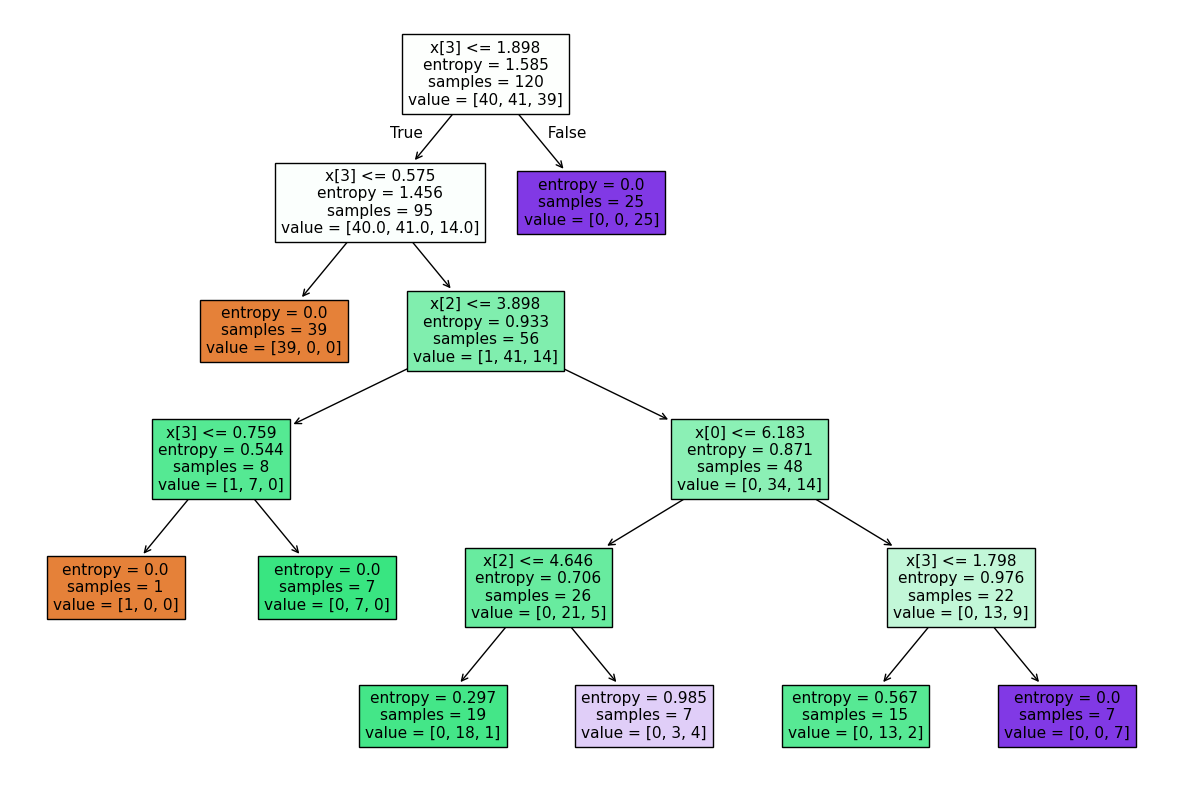

In [68]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(grid.best_estimator_, filled=True)
plt.show()

In [67]:
y_pred = grid.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred))

accuracy_score =  0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Random Forest + Adaboost + Gradient Boost + Xgboost

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
from sklearn.datasets import load_breast_cancer

In [123]:
x = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)

In [124]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [125]:
y = pd.DataFrame(load_breast_cancer().target, columns = ['target'])

In [126]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Random Forest**

In [128]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForest = RandomForestClassifier()
params = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [129]:
from sklearn.model_selection import RandomizedSearchCV
distributions_RandomForest = RandomizedSearchCV(estimator = model_RandomForest, param_distributions = params, refit=True, verbose=3, n_jobs=-1)

In [130]:
distributions_RandomForest.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=3)

In [131]:
distributions_RandomForest

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=3)

In [132]:
distributions_RandomForest.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'entropy'}

In [133]:
distributions_RandomForest.best_score_

np.float64(0.9626373626373625)

In [136]:
y_pred_RandomForest = distributions_RandomForest.predict(x_test)

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred_RandomForest))
print(confusion_matrix(y_test, y_pred_RandomForest))
print("")
print(classification_report(y_test, y_pred_RandomForest))

accuracy_score =  0.9649122807017544
[[40  3]
 [ 1 70]]

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**AdaBoost**

In [138]:
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost = AdaBoostClassifier()
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [139]:
from sklearn.model_selection import RandomizedSearchCV
distributions_AdaBoost = RandomizedSearchCV(estimator = model_AdaBoost, param_distributions = params, refit=True, verbose=3, n_jobs=-1)

In [140]:
distributions_AdaBoost.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'n_estimators': [50, 100, 200]},
                   verbose=3)

In [141]:
distributions_AdaBoost

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'n_estimators': [50, 100, 200]},
                   verbose=3)

In [142]:
distributions_AdaBoost.best_params_

{'n_estimators': 50, 'learning_rate': 0.1, 'algorithm': 'SAMME'}

In [143]:
distributions_AdaBoost.best_score_

np.float64(0.9516483516483516)

In [144]:
y_pred_AdaBoost = distributions_AdaBoost.predict(x_test)

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred_AdaBoost))
print(confusion_matrix(y_test, y_pred_AdaBoost))
print("")
print(classification_report(y_test, y_pred_AdaBoost))

accuracy_score =  0.956140350877193
[[40  3]
 [ 2 69]]

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Gradient Boost

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
model_GradientBoosting = GradientBoostingClassifier()
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.8, 0.9, 1.0],
    'loss': ['log_loss', 'exponential'],
    'criterion': ['friedman_mse', 'mse', 'mae']
}

In [153]:
from sklearn.model_selection import RandomizedSearchCV
distributions_GradientBoosting = RandomizedSearchCV(estimator = model_GradientBoosting, param_distributions = params, refit=True, verbose=3, n_jobs=-1)

In [154]:
distributions_GradientBoosting.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=3)

In [155]:
distributions_GradientBoosting

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=3)

In [156]:
distributions_GradientBoosting.best_params_

{'subsample': 1.0,
 'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 7,
 'loss': 'log_loss',
 'learning_rate': 0.01,
 'criterion': 'friedman_mse'}

In [157]:
distributions_GradientBoosting.best_score_

np.float64(0.945054945054945)

In [158]:
y_pred_GradientBoosting = distributions_GradientBoosting.predict(x_test)

In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred_GradientBoosting))
print(confusion_matrix(y_test, y_pred_GradientBoosting))
print("")
print(classification_report(y_test, y_pred_GradientBoosting))

accuracy_score =  0.9649122807017544
[[40  3]
 [ 1 70]]

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Xgboost

In [161]:
!pip install xgboost

In [169]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2],
    'objective': ['binary:logistic', 'binary:logitraw', 'binary:hinge'],
    'eval_metric': ['logloss', 'error'],
    'tree_method': ['auto', 'exact', 'approx', 'hist'],
    'grow_policy': ['depthwise', 'lossguide']
}

In [170]:
from sklearn.model_selection import RandomizedSearchCV
distributions_XGB= RandomizedSearchCV(estimator = model_XGB, param_distributions = params, refit=True, verbose=3, n_jobs=-1)

In [171]:
distributions_XGB.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                        'gamma': [0, 0.1, 0.2],
                                        'grow_policy': ['depthwise',
                                                        'lossguide'],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200],
                                        'objective': ['binary:logistic',
                                                      'binary:logitraw',
                                                      'binary:hinge'],
                                        'reg_alpha': [0, 0.1, 0.2],
                                        'reg_lambda': [0, 0.1, 0.2],
                                        'subsample': [0.8, 0.9, 1.0],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']},
                   verbose=3)

In [172]:
distributions_XGB.best_params_

{'tree_method': 'hist',
 'subsample': 1.0,
 'reg_lambda': 0,
 'reg_alpha': 0,
 'objective': 'binary:logitraw',
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.1,
 'grow_policy': 'depthwise',
 'gamma': 0.2,
 'eval_metric': 'logloss',
 'colsample_bytree': 0.8}

In [173]:
distributions_XGB.best_score_

np.float64(0.9736263736263737)

In [174]:
y_pred_XGB = distributions_XGB.predict(x_test)

In [176]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score = ",accuracy_score(y_test, y_pred_XGB))
print(confusion_matrix(y_test, y_pred_XGB))
print("")
print(classification_report(y_test, y_pred_XGB))

accuracy_score =  0.956140350877193
[[40  3]
 [ 2 69]]

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# PCA

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
from sklearn.datasets import load_diabetes
x = pd.DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
y = pd.DataFrame(load_diabetes().target, columns = ['target'])

In [186]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [187]:
y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [234]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

*Dimensional Reduction*

In [235]:
data_pca = pca.transform(x)

In [236]:
pca.explained_variance_

array([0.00912519, 0.00338394])

Text(0, 0.5, 'PC2')

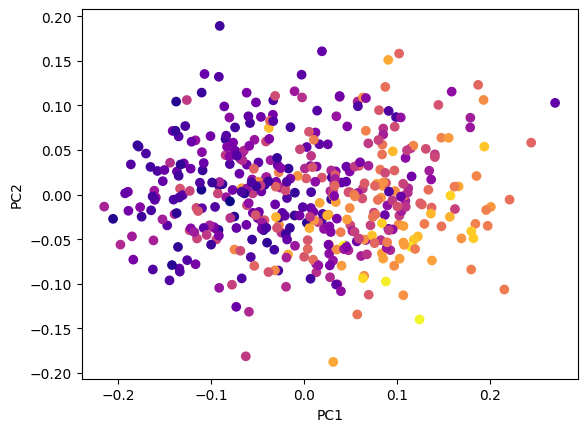

In [240]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y['target'], cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')

# K-means Clustering

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=300, n_features= 6, centers=3, random_state=42)

**PCA**

In [278]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

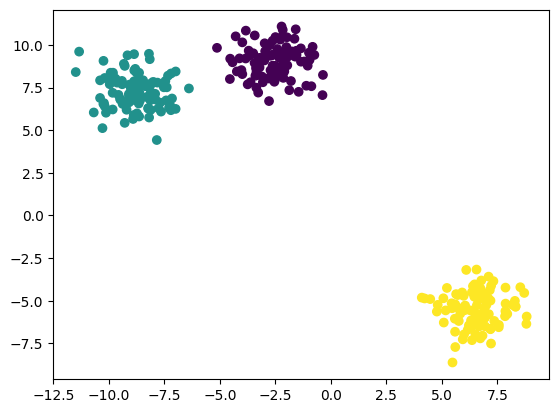

In [279]:
plt.scatter(x[:, 0], x[:, 1], c=y)

Standardization

In [280]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [281]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [282]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [283]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

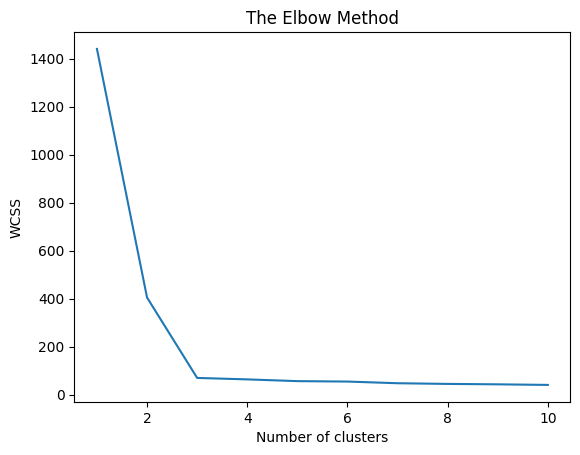

In [284]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [285]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit_predict(x_train_scaled)

array([2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2,
       0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1,
       2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0,
       2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1,
       2, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 2],
      dtype=int32)

In [286]:
y_pred = kmeans.predict(x_test_scaled)
y_pred

array([0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0,
       0, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0], dtype=int32)

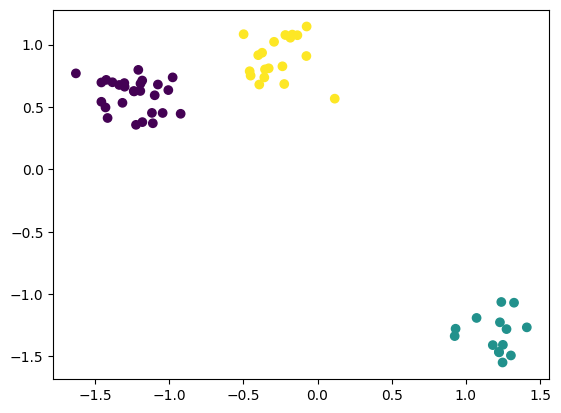

In [287]:
plt.scatter(x_test_scaled[:, 0], x_test_scaled[:, 1], c=y_pred)

**Validation of the k value**

1. kneelocator

In [288]:
!pip install kneed

In [290]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(3)

2. Silhoutte score

In [296]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

In [297]:
silhouette_scores

[np.float64(0.6801922314553188),
 np.float64(0.7860539101213557),
 np.float64(0.6205882975791052),
 np.float64(0.40906440377992587),
 np.float64(0.39100054393174033),
 np.float64(0.2184292089315652),
 np.float64(0.20639519647039972),
 np.float64(0.20399524574692507),
 np.float64(0.18610959857647197)]

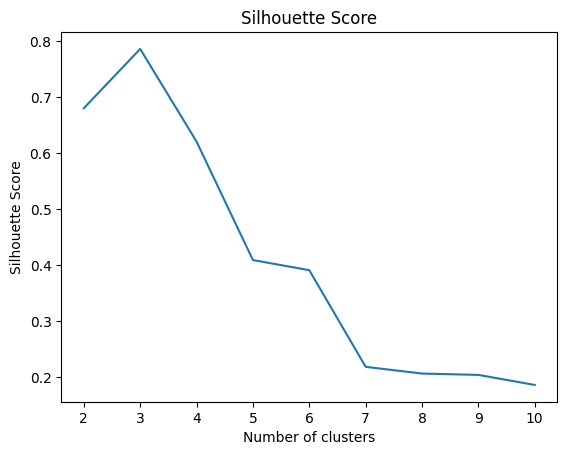

In [298]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Hierarichal Clustering

In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
from sklearn.datasets import load_iris
x = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
y = pd.DataFrame(load_iris().target, columns = ['target'])

Standardization

In [337]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

PCA

In [338]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_scaled_data = pca.fit_transform(x_scaled)

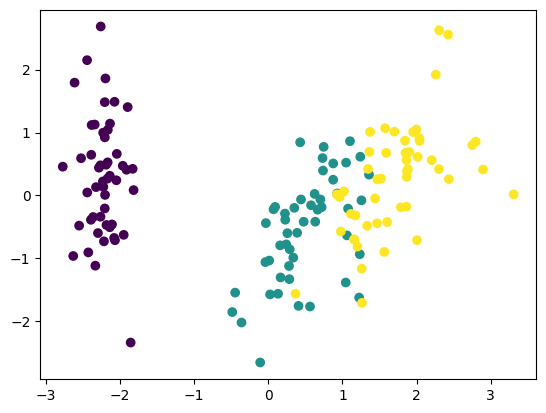

In [339]:
plt.scatter(pca_scaled_data[:,0], pca_scaled_data[:,1], c=y['target'])

Dendogram

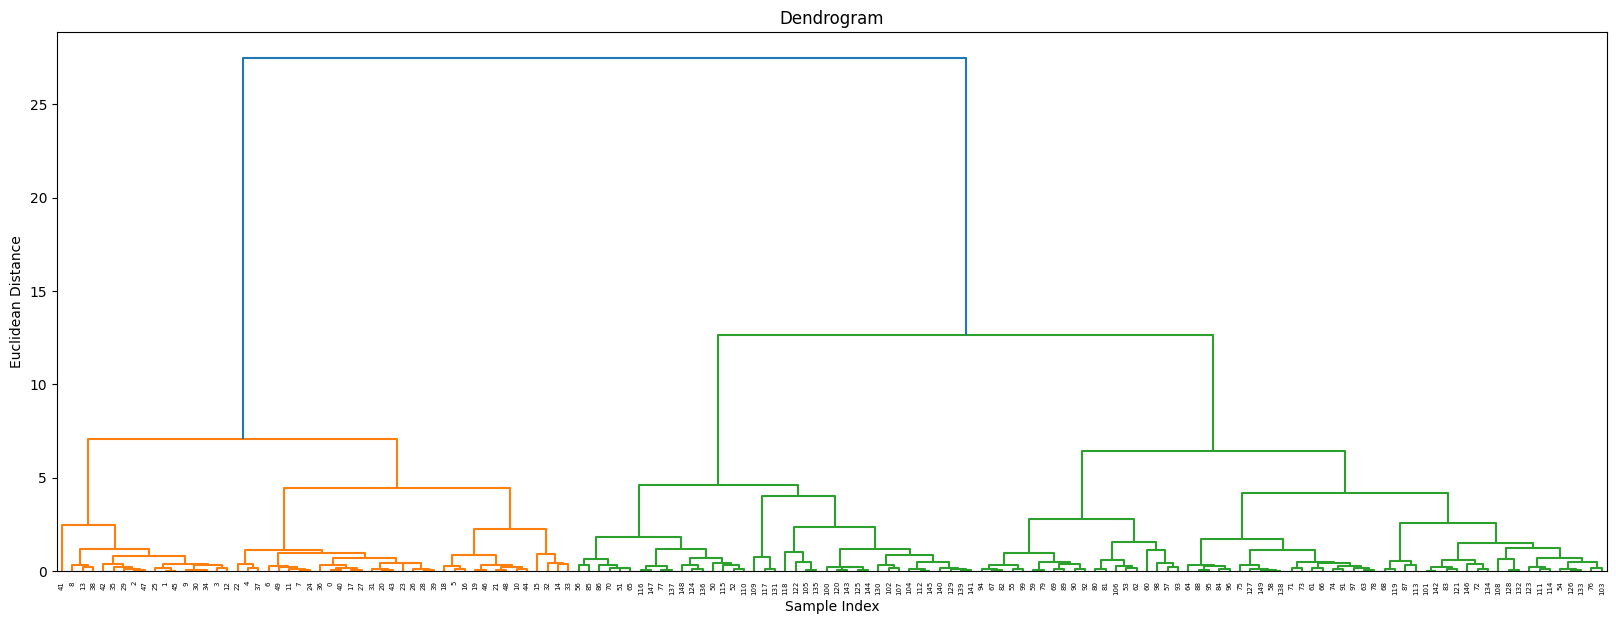

In [340]:
plt.figure(figsize=(20, 7))
dendrogram = sch.dendrogram(sch.linkage(pca_scaled_data, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [341]:
from sklearn.cluster import AgglomerativeClustering
Agglocluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_pred = Agglocluster.fit_predict(pca_scaled_data)

In [342]:
Agglocluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

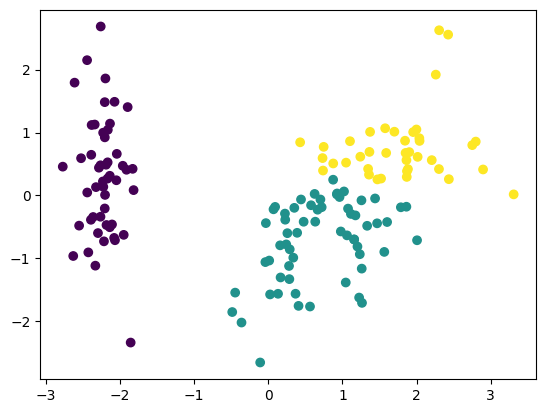

In [343]:
plt.scatter(pca_scaled_data[:, 0], pca_scaled_data[:, 1], c=Agglocluster.labels_)

**silhouette_score**

In [344]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 11):
    Agglocluster = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    Agglocluster.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled, Agglocluster.labels_)
    silhouette_scores.append(score)

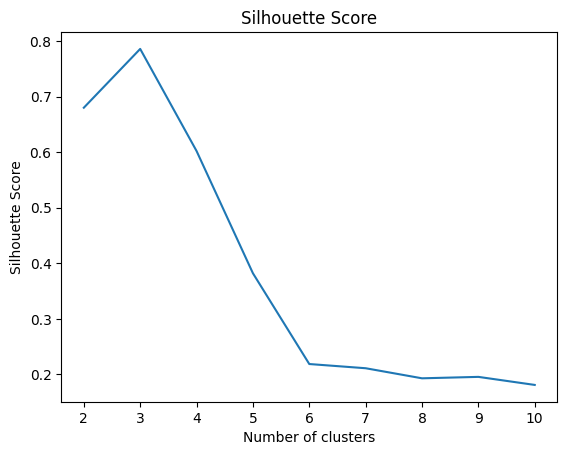

In [345]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# DBSCAN Clustering

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=300, noise=0.05, random_state=42)

In [327]:
x = pd.DataFrame(x, columns=['x1', 'x2'])

In [328]:
x.head()

,x1,x2
0,0.622519,-0.372101
1,1.904269,-0.136303
2,-0.069431,0.456117
3,0.933899,0.237483
4,1.180360,-0.490847


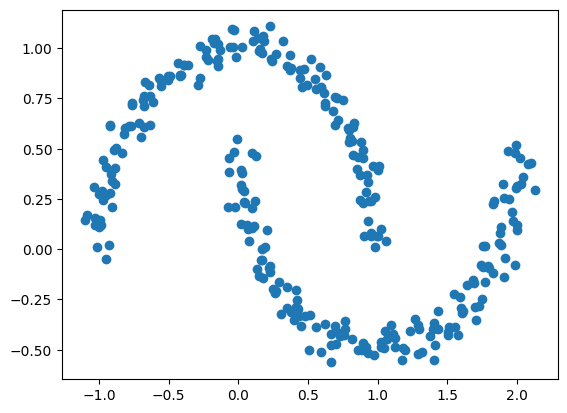

In [329]:
plt.scatter(x['x1'], x['x2'])

StanderScaling

In [330]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [331]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(x_scaled)

DBSCAN(eps=0.3)

In [332]:
dbscan.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

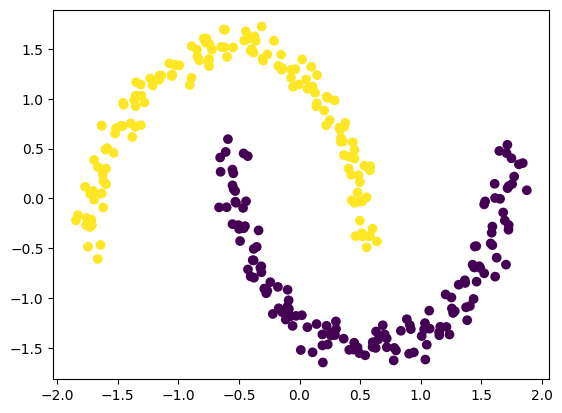

In [333]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=dbscan.labels_)

**silhouette score** (here it is not reliable)

In [347]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for i in range(2, 11):
  dbscan = DBSCAN(eps=0.3, min_samples=i)
  dbscan.fit(x_train_scaled)
  score = silhouette_score(x_train_scaled, dbscan.labels_)
  silhouette_scores.append(score)

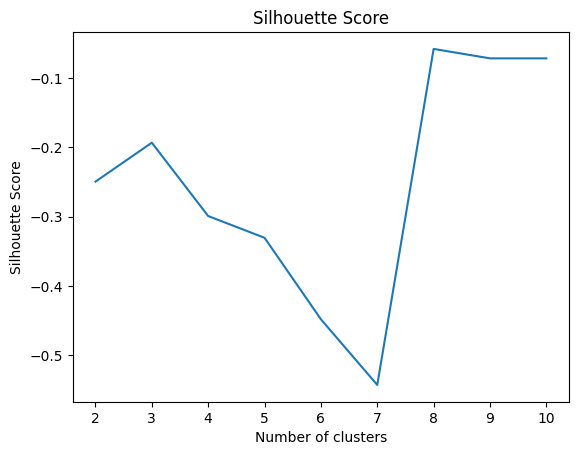

In [348]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()